# Discriminant Analysis of Vowel Data

### Author: Shaohao Chen ,   Email: shaohao@bu.edu

## I. Description of the problem

Download the vowels data from https://web.stanford.edu/~hastie/ElemStatLearn/data.html .
There are 11 vowels to distinguish, based on 10 features for each training/test sample of a vowel. We will use linear and quadratic discrimant methods to analyze the data. The following two ways are used:

1. Quadratic discriminant analysis: Fit a different Gaussian model for each of the 11 classes. This involves determining both a different centroid $\mu_k$ and a different covariance $\Sigma_k$ for each class $k$.
2. Linear discriminant analysis on a quadratic basis: Increase the input space beyond the 10 features above by including quadratic and interaction terms (e.g. $x_i^2$, $x_i x_j$) as well. Then fit the same Gaussian model for the 11 classes. A common covariance $\Sigma$ is assumed.

## II. Implementation with Python

Following is the code implemented by Python. The Numpy package is used for linear algebra operations. The raw vowel data is saved in CSV format and is loaded to Numpy arrays. The QDA and LDA are done by calling functions in the Sciki-learn package. These functions fit the models, predict the results and return correct classification rates. The least-square solver is used for LDA. I wrote a function to construct quadratic basis from the given linear basis. The visualization is done by the Matplotlib. I wrote a function to plot figures for classification results in two-dimentional subspaces. The correct and error predictions in each of the 11 classes are idendified. 

====== QDA ======
Misclassification rate of training data =  0.011363636363636354
Misclassification rate of test data =  0.5281385281385281
====== LDA: quadratic basis ======
Misclassification rate of training data =  0.022727272727272707
Misclassification rate of test data =  0.43939393939393945


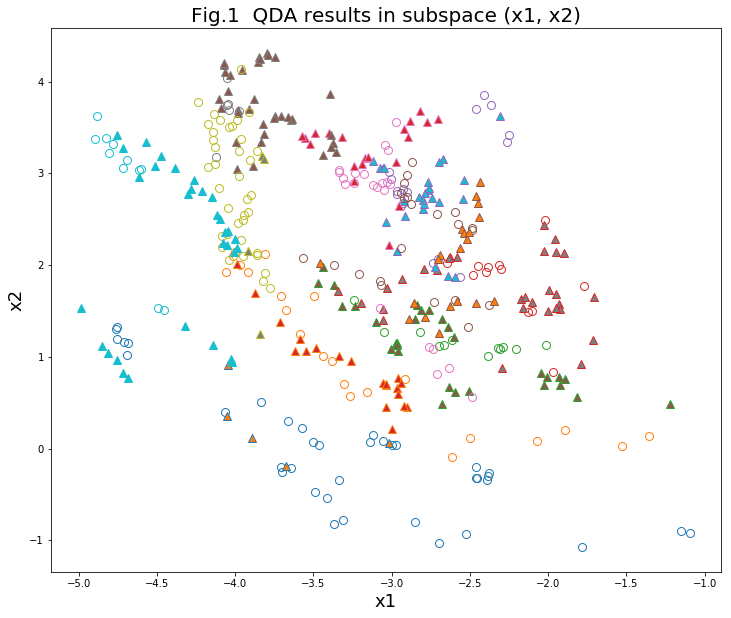

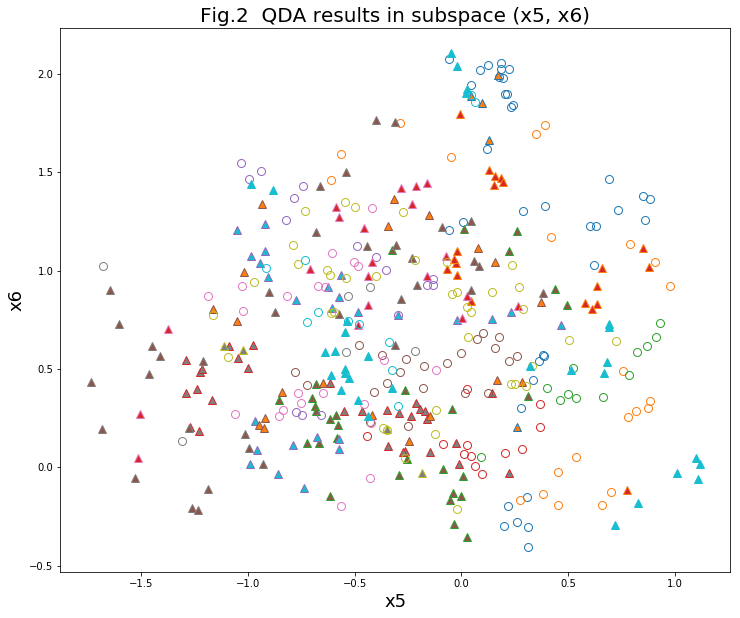

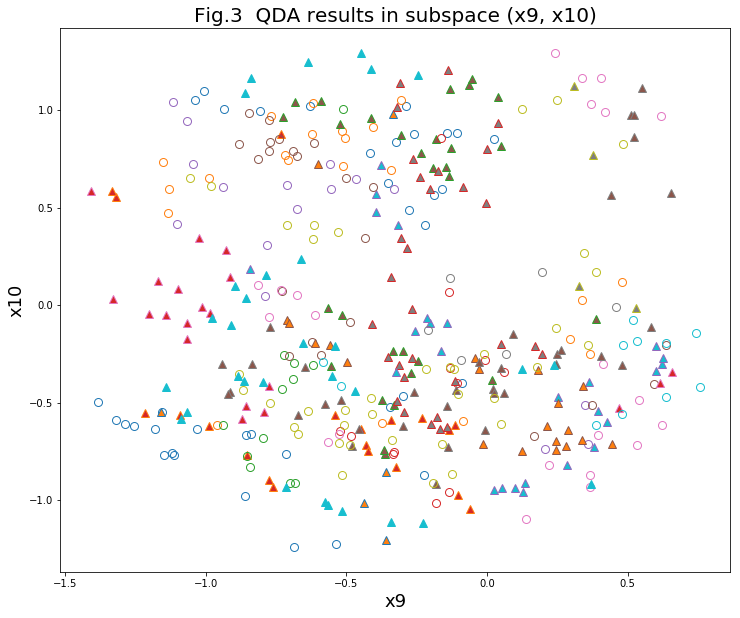

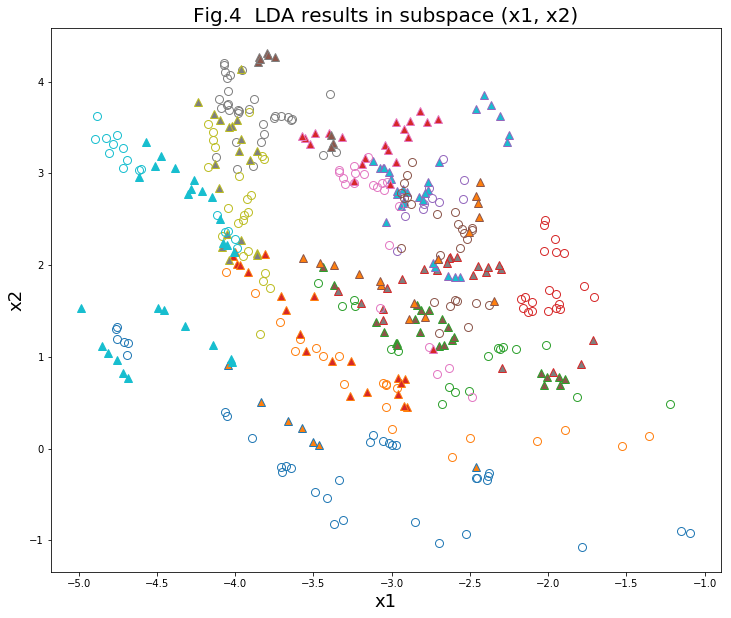

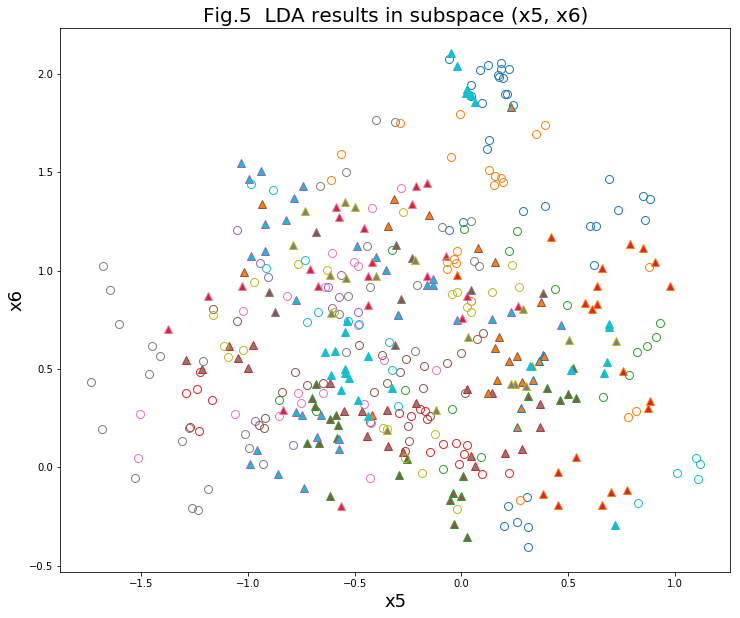

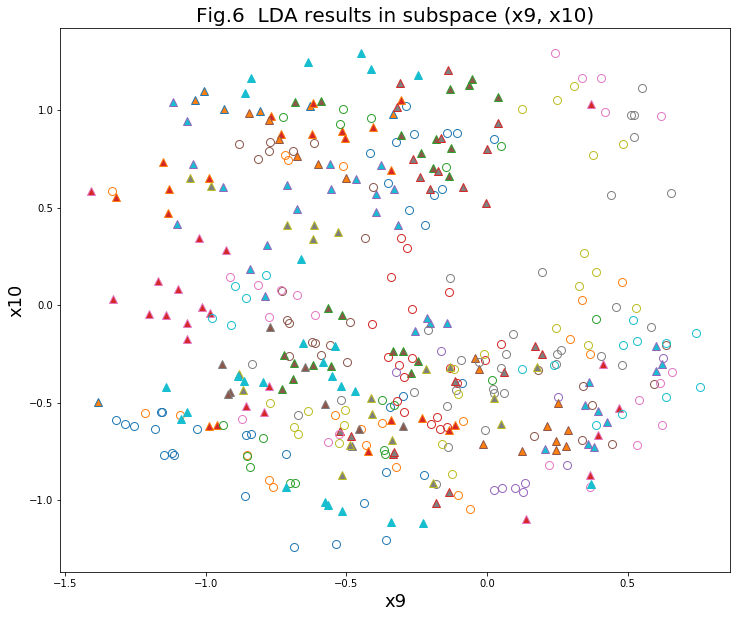

In [2]:
# Import necessary python modules.
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
from matplotlib import colors

# A function to construct quadratic basis from linear basis
def quad_basis(h_lin):
    dim = h_lin.shape[1]  # number of original dimensions = number of columes of X
    dim_add = dim*(dim+1)/2  # number of dimensions to be added
    n_row = h_lin.shape[0]   # number of rows of X
    h_add = np.zeros((n_row,dim_add))  # shape of the sub matrix for new dimensions
    index=0
    for i in range(0, dim):
        for j in range(i, dim):
           h_add[...,index] = h_lin[...,i]*h_lin[...,j]  # compute the sub matrix for new dimensions
           index += 1
    h_quad = np.concatenate((h_lin, h_add), axis=1)   # append new dimensions to obtain new X
    return h_quad

# A function to plot results
def plot_classification(y, y_pred, dim1, dim2, p_dim, xlab, ylab, title, n_fig):
    msize=8
    mcolor=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
    correct_i = np.where(y==y_pred)   # Index of correct predictions
    error_i = np.where(y!=y_pred)     # Index of error predictions
    for i in range(p_dim):
       class_i = np.where(y==i+1)  # Index of the i-th class
       correct_class_i = np.intersect1d(correct_i, class_i)  # Index of correct predictions in the i-th class
       error_class_i = np.intersect1d(error_i, class_i)   # Index of error predictions in the i-th class
       plt.plot(X0[correct_class_i, dim1], X0[correct_class_i, dim2], 'o', markeredgecolor=mcolor[i],
markerfacecolor='None', markersize=msize)   # plot correct predictions
       plt.plot(X0[error_class_i, dim1], X0[error_class_i, dim2], '^', markeredgecolor=mcolor[i], markersize=msize)   # plot error predictions
    lsize=18
    plt.xlabel(xlab, fontsize=lsize)
    plt.ylabel(ylab, fontsize=lsize)
    tsize=20
    full_title = "Fig." + n_fig + "  " + title
    plt.title(full_title, fontsize=tsize)

# ====== Start main program ======
# Read vovwel data from csv file and save in numpy arrays
training_data = np.genfromtxt('vowel_data/training_nohead.csv', delimiter=',')
test_data = np.genfromtxt('vowel_data/test_nohead.csv', delimiter=',')

# Feed X and y with training data
y = training_data[...,1]  # 2nd column
X = training_data[...,2:]  # from 3rd column onwards
# Feed X0 and y0 with test data
y0 = test_data[...,1]  # 2nd column
X0 = test_data[...,2:]  # from 3rd column onwards

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)  # Call QDA in Scikit-learn
qda.fit(X, y)    # Fit with training data
y0_qda = qda.predict(X0)  # Predict with test data
print "====== QDA ======"
print "Misclassification rate of training data = ", 1 - qda.score(X, y)   
print "Misclassification rate of test data = ", 1 - qda.score(X0, y0)  

# Construct quadratic basis from linear basis for both training and test data
X_quad = quad_basis(X)
X0_quad = quad_basis(X0)
# Linear Discriminant Analysis with quadratic basis
lda_quad = LinearDiscriminantAnalysis(solver="lsqr",store_covariance=True) # Call LDA in Scikit-learn
lda_quad.fit(X_quad, y)    # Fit with training data
y0_lda_quad = lda_quad.predict(X0_quad)  # Predict with test data
print "====== LDA: quadratic basis ======"
print "Misclassification rate of training data = ", 1 - lda_quad.score(X_quad, y) 
print "Misclassification rate of test data = ", 1 - lda_quad.score(X0_quad, y0)   

# Visialization
width = 12
height = 10
plt.figure(figsize=(width, height))
plot_classification(y0, y0_qda, 0, 1, 10, "x1", "x2", "QDA results in subspace (x1, x2)", "1")
plt.figure(figsize=(width, height))
plot_classification(y0, y0_qda, 4, 5, 10, "x5", "x6", "QDA results in subspace (x5, x6)","2")
plt.figure(figsize=(width, height))
plot_classification(y0, y0_qda, 8, 9, 10, "x9", "x10", "QDA results in subspace (x9, x10)","3")
plt.figure(figsize=(width, height))
plot_classification(y0, y0_lda_quad, 0, 1, 10, "x1", "x2", "LDA results in subspace (x1, x2)","4")
plt.figure(figsize=(width, height))
plot_classification(y0, y0_lda_quad, 4, 5, 10, "x5", "x6", "LDA results in subspace (x5, x6)","5")
plt.figure(figsize=(width, height))
plot_classification(y0, y0_lda_quad, 8, 9, 10, "x9", "x10", "LDA results in subspace (x9, x10)","6")
plt.show()

## III. Discussions

### III.1 Misclassification rates

For QDA, the misclassification rate of training data is $0.011$ and that of test data is $0.528$. For LDA on the quadratic basis, the misclassification rate of training data is $0.023$ and that of test datae is $0.439$. As expected, the training misclassification rates are very low, since we use the fitted model to predict with in-sample data. Also as expected, the misclassification rate of the test data is much higher, since we predict with out-of-sample data. The test misclassification rate ($0.528$) given by the QDA method is the same as the value listed in the Hastie Book and it is acceptable for a 10-dimension 11-class problem. The test misclassification rate given by the LDA method on the quadratic basis ($0.439$) is better than that of QDA, and is better than the results of many other methods listed in the oiriginal document in the vowol data pakage. In this LDA model, total 65 basis functions are used. To obtain an even better test misclassification rate, cross-validation may be needed. 

### III.2 Visualization

The data is in 10 dimentions. In both models, the discriminant boarders are 10-dimension quadratic hyperplanes. It is not starghtforward to visualize the data. I visualize the test data in three selected two-dimension subspaces (See Fig. 1 - Fig. 6 above). Points in the 11 classes are plotted in different colors, while correct and error predicted points are in different shapes of markers. The circle marker is for correct prdictions, while the triangle marker is for error predictions.